In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

## Reflect Tables into SQLAlchemy ORM

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)
print(inspector.get_table_names())

['measurement', 'station']


In [7]:
columns = inspector.get_columns("measurement")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns("station")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


## Query for Prcp

In [9]:
query1 = """
        SELECT
            date,
            prcp
        FROM
            measurement
        WHERE
            date >= ( 
            SELECT 
                date(MAX(date), '-365 day')
            FROM 
                measurement
            )
        ORDER BY 
            date
        """

In [10]:
conn = engine.connect()
df = pd.read_sql(query1, con=conn)
conn.close()

In [11]:
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [12]:
df.dropna(0).set_index('date').sort_index()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


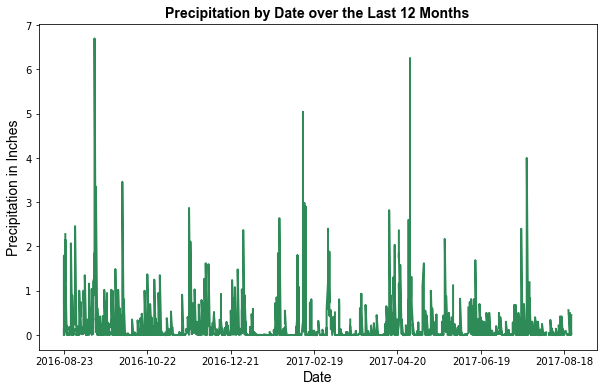

In [13]:
#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.plot(df.date, df.prcp, linewidth=2, color = "seagreen")

# Give our chart some labels and a title
plt.title("Precipitation by Date over the Last 12 Months", fontweight="bold", fontsize=14, fontname="Arial")
plt.xlabel("Date", fontsize=14, fontname="Arial")
plt.ylabel("Precipitation in Inches", fontsize=14, fontname="Arial")
plt.xticks(np.arange(0,365,60))

plt.show()

In [14]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Query for Number of stations 

In [15]:
query2 = """
        SELECT
            count(*) as "Number of stations"
        FROM
            station
        """

In [16]:
conn = engine.connect()
df2 = pd.read_sql(query2, con=conn)
conn.close()

In [17]:
df2.head()

,Number of stations
0,9


## Query for Most Active Stations 

In [18]:
query3 = """
        SELECT
            count(m.station) as "Number of Measurements", 
            m.station, 
            s.name
        
        FROM
            measurement m 
        join station s on m.station = s.station
        
        GROUP BY 
            m.station
        ORDER BY 
            "Number of Measurements" desc
        """

In [19]:
conn = engine.connect()
df3 = pd.read_sql(query3, con=conn)
conn.close()

In [20]:
df3

,Number of Measurements,station,name
0,2772,USC00519281,"WAIHEE 837.5, HI US"
1,2724,USC00519397,"WAIKIKI 717.2, HI US"
2,2709,USC00513117,"KANEOHE 838.1, HI US"
3,2669,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
4,2612,USC00516128,"MANOA LYON ARBO 785.2, HI US"
5,2202,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
6,1979,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US"
7,1372,USC00517948,"PEARL CITY, HI US"
8,511,USC00518838,"UPPER WAHIAWA 874.3, HI US"


## Query for Temperature Measurements 

In [21]:
query4 = """
        SELECT
            MIN(m.tobs) as "Minimum Temperature", 
            MAX(m.tobs) as "Maximum Temperature", 
            AVG(m.tobs) as "Average Temperature", 
            m.station, 
            s.name
        
        FROM
            measurement m 
        join station s on m.station = s.station
        WHERE
            m.station = 'USC00519281'
    
        """

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [23]:
conn = engine.connect()
df4 = pd.read_sql(query4, con=conn)
conn.close()

In [24]:
df4.head()

,Minimum Temperature,Maximum Temperature,Average Temperature,station,name
0,54.0,85.0,71.663781,USC00519281,"WAIHEE 837.5, HI US"


In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [26]:
query5 = """
        SELECT
            count(m.tobs) as "Number of Temperature Measurements", 
            m.station, 
            s.name
        
        FROM
            measurement m 
        join station s on m.station = s.station
        
        GROUP BY 
            m.station
        ORDER BY 
            "Number of Temperature Measurements" desc
        """
    

In [27]:
conn = engine.connect()
df5 = pd.read_sql(query5, con=conn)
conn.close()

In [28]:
df5

,Number of Temperature Measurements,station,name
0,2772,USC00519281,"WAIHEE 837.5, HI US"
1,2724,USC00519397,"WAIKIKI 717.2, HI US"
2,2709,USC00513117,"KANEOHE 838.1, HI US"
3,2669,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
4,2612,USC00516128,"MANOA LYON ARBO 785.2, HI US"
5,2202,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
6,1979,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US"
7,1372,USC00517948,"PEARL CITY, HI US"
8,511,USC00518838,"UPPER WAHIAWA 874.3, HI US"


In [29]:
query6 = """
        SELECT
            m.tobs, 
            m.date
        
        FROM
            measurement m 
        join station s on m.station = s.station
        WHERE
            m.station = 'USC00519281' and 
            date >= ( 
            SELECT 
                date(MAX(date), '-365 day')
            FROM 
                measurement
            )
    
        """

In [30]:
conn = engine.connect()
df6 = pd.read_sql(query6, con=conn)
conn.close()

In [31]:
df6

,tobs,date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27
...,...,...
347,77.0,2017-08-14
348,77.0,2017-08-15
349,76.0,2017-08-16
350,76.0,2017-08-17


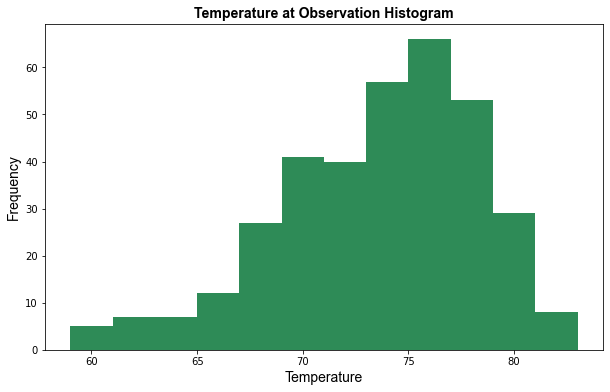

In [32]:
plt.figure(figsize=(10,6))

plt.hist(df6.tobs, bins=12, color="seagreen")
plt.title("Temperature at Observation Histogram", fontweight="bold", fontsize=14, fontname="Arial")
plt.xlabel("Temperature", fontsize=14, fontname="Arial")
plt.ylabel("Frequency", fontsize=14, fontname="Arial")

plt.show()